In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import plotly.express as px
import statsmodels.api as sm
from statsmodels.formula.api import ols

### 0. Data familiarisation and cleaning

In [2]:
# Impporting csv file
car_df = pd.read_csv(r"car_prices.csv", delimiter=',', on_bad_lines='skip') # Skipping 17 out of 558812, because of faulty data
df_original_len = len(car_df)
print('Original length of dataframe:', df_original_len)
print("There are {} rows and {} columns in the dataset".format(car_df.shape[0], car_df.shape[1]))

Original length of dataframe: 558812
There are 558812 rows and 16 columns in the dataset


In [3]:
car_df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [4]:
car_df.tail()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
558807,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,4.5,18255.0,silver,black,avis corporation,35300,33000,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558808,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200,30800,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558809,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,4.8,50561.0,black,black,financial services remarketing (lease),29800,34000,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558810,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,3.8,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100,11100,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)
558811,2014,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1et2eke87277,ca,3.4,15008.0,gray,gray,"ford motor credit company,llc pd",29600,26700,Thu May 28 2015 05:30:00 GMT-0700 (PDT)


In [5]:
#renaming 'make' to 'brand' for easier understanding
car_df.rename(columns={'make': 'brand'}, inplace=True)

In [6]:
car_df.head()

,year,brand,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [7]:
#Getting dataframe information
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558812 entries, 0 to 558811
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558812 non-null  int64  
 1   brand         548511 non-null  object 
 2   model         548413 non-null  object 
 3   trim          548161 non-null  object 
 4   body          545617 non-null  object 
 5   transmission  493459 non-null  object 
 6   vin           558812 non-null  object 
 7   state         558812 non-null  object 
 8   condition     547018 non-null  float64
 9   odometer      558718 non-null  float64
 10  color         558063 non-null  object 
 11  interior      558063 non-null  object 
 12  seller        558812 non-null  object 
 13  mmr           558812 non-null  int64  
 14  sellingprice  558812 non-null  int64  
 15  saledate      558812 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


In [8]:
#Accessing column names
car_df.columns.values

array(['year', 'brand', 'model', 'trim', 'body', 'transmission', 'vin',
       'state', 'condition', 'odometer', 'color', 'interior', 'seller',
       'mmr', 'sellingprice', 'saledate'], dtype=object)

In [9]:
#Generating descriptive statistics upfront
car_df.describe()

,year,condition,odometer,mmr,sellingprice
count,558812.000000,547018.000000,558718.000000,558812.000000,558812.000000
mean,2010.038705,3.424514,68323.082106,13769.323628,13611.267630
std,3.966814,0.949439,53397.772770,9679.865976,9749.648961
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,2.700000,28374.000000,7100.000000,6900.000000
50%,2012.000000,3.600000,52255.500000,12250.000000,12100.000000
75%,2013.000000,4.200000,99112.000000,18300.000000,18200.000000
max,2015.000000,5.000000,999999.000000,182000.000000,230000.000000


In [10]:
#Checking brand names and typos for mapping after
pd.set_option('display.max_rows', None)
car_df['brand'].value_counts()

Ford             93554
Chevrolet        60197
Nissan           53946
Toyota           39871
Dodge            30710
Honda            27206
Hyundai          21816
BMW              20719
Kia              18077
Chrysler         17276
Mercedes-Benz    17141
Jeep             15372
Infiniti         15305
Volkswagen       12556
Lexus            11861
GMC              10613
Mazda             8362
Cadillac          7519
Acura             5901
Audi              5869
Lincoln           5757
Buick             5107
Subaru            5043
Ram               4574
Pontiac           4497
Mitsubishi        4140
Volvo             3788
MINI              3224
Saturn            2841
Mercury           1992
Land Rover        1735
Scion             1687
Jaguar            1420
Porsche           1383
Suzuki            1073
FIAT               865
HUMMER             805
Saab               484
ford               443
smart              396
chevrolet          390
Oldsmobile         364
dodge              245
chrysler   

In [11]:
#Mapping similar brand names to a consistent format
car_df['brand'].replace({
    'vw' : 'Volkswagen',
    'ford tk' : 'Ford',
    'ford truck' : 'Ford',
    'chev truck' : 'Chevrolet',
    'dodge tk' : 'Dodge',
    'hyundai tk' : 'Hyundai',
    'bmw' : 'BMW',
    'mercedes-b' : 'Mercedes-Benz',
    'mercedes' : 'Mercedes-Benz',
    'gmc' : 'GMC',
    'gmc truck' : 'GMC',
    'mazda tk' : 'Mazda',
    'landrover' : 'Land Rover',
}, inplace=True)

In [12]:
#Checking brand names and typos after mapping
car_df['brand'].value_counts()

Ford             93558
Chevrolet        60198
Nissan           53946
Toyota           39871
Dodge            30711
Honda            27206
Hyundai          21817
BMW              20793
Kia              18077
Chrysler         17276
Mercedes-Benz    17213
Jeep             15372
Infiniti         15305
Volkswagen       12580
Lexus            11861
GMC              10649
Mazda             8363
Cadillac          7519
Acura             5901
Audi              5869
Lincoln           5757
Buick             5107
Subaru            5043
Ram               4574
Pontiac           4497
Mitsubishi        4140
Volvo             3788
MINI              3224
Saturn            2841
Mercury           1992
Land Rover        1762
Scion             1687
Jaguar            1420
Porsche           1383
Suzuki            1073
FIAT               865
HUMMER             805
Saab               484
ford               443
smart              396
chevrolet          390
Oldsmobile         364
dodge              245
chrysler   

In [13]:
#Capitalizing brand names
car_df['brand'] = car_df['brand'].str.capitalize()
car_df['brand'].value_counts()

Ford             94001
Chevrolet        60588
Nissan           54017
Toyota           39966
Dodge            30956
Honda            27351
Hyundai          21837
Bmw              20793
Kia              18084
Chrysler         17485
Mercedes-benz    17213
Jeep             15483
Infiniti         15305
Volkswagen       12604
Lexus            11980
Gmc              10649
Mazda             8509
Cadillac          7629
Acura             5926
Audi              5877
Lincoln           5786
Buick             5121
Subaru            5103
Ram               4574
Pontiac           4524
Mitsubishi        4257
Volvo             3788
Mini              3224
Saturn            2841
Mercury           2023
Land rover        1891
Scion             1687
Jaguar            1420
Porsche           1402
Suzuki            1078
Fiat               865
Hummer             805
Saab               484
Smart              396
Oldsmobile         384
Isuzu              204
Maserati           136
Bentley            116
Plymouth   

In [14]:
#Checking for missing values
missing_values = car_df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
year                0
brand           10301
model           10399
trim            10651
body            13195
transmission    65353
vin                 0
state               0
condition       11794
odometer           94
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64


In [15]:
#Checking brand names and typos after mapping
car_df['body'].value_counts()

Sedan                      199438
SUV                        119292
sedan                       41906
suv                         24552
Hatchback                   21380
Minivan                     21363
Coupe                       14602
Wagon                       13630
Crew Cab                    13280
Convertible                  8652
SuperCrew                    7423
G Sedan                      5999
hatchback                    4857
SuperCab                     4449
minivan                      4166
Regular Cab                  4067
Van                          3958
Extended Cab                 3824
Quad Cab                     3436
coupe                        3150
crew cab                     3114
wagon                        2499
convertible                  1824
supercrew                    1610
E-Series Van                 1455
g sedan                      1418
G Coupe                      1263
Double Cab                   1251
supercab                      862
regular cab   

In [16]:
car_df['body'] = car_df['body'].str.title()

In [17]:
car_df['body'].value_counts()

Sedan                      241344
Suv                        143844
Hatchback                   26237
Minivan                     25529
Coupe                       17752
Crew Cab                    16394
Wagon                       16129
Convertible                 10476
Supercrew                    9033
G Sedan                      7417
Supercab                     5311
Regular Cab                  4850
Van                          4528
Extended Cab                 4507
Quad Cab                     4095
E-Series Van                 1823
Double Cab                   1601
G Coupe                      1593
Crewmax Cab                   565
King Cab                      532
G Convertible                 323
Access Cab                    294
Genesis Coupe                 294
Koup                          180
Club Cab                      178
Cts Coupe                     158
Mega Cab                      111
Elantra Coupe                 103
Promaster Cargo Van            59
Beetle Convert

In [18]:
car_df['body'] = car_df['body'].replace({'Suv': 'SUV', 'Supercrew': 'SuperCrew', 'Regular-Cab': 'Regular Cab'})

In [19]:
car_df['body'].value_counts()

Sedan                      241344
SUV                        143844
Hatchback                   26237
Minivan                     25529
Coupe                       17752
Crew Cab                    16394
Wagon                       16129
Convertible                 10476
SuperCrew                    9033
G Sedan                      7417
Supercab                     5311
Regular Cab                  4865
Van                          4528
Extended Cab                 4507
Quad Cab                     4095
E-Series Van                 1823
Double Cab                   1601
G Coupe                      1593
Crewmax Cab                   565
King Cab                      532
G Convertible                 323
Access Cab                    294
Genesis Coupe                 294
Koup                          180
Club Cab                      178
Cts Coupe                     158
Mega Cab                      111
Elantra Coupe                 103
Beetle Convertible             59
Promaster Carg

In [20]:
#Identify rows with missing 'transmission'
missing_transmission = car_df[car_df['transmission'].isnull()]

#Group by 'brand', 'model', 'trim', and 'year' columns
grouped = car_df.groupby(['brand', 'model', 'trim', 'year'])

#Function to fill missing 'transmission' with most frequent value in each group
def fill_missing_transmission(group):
    most_common = group['transmission'].mode()
    if len(most_common) > 0:
        group['transmission'] = group['transmission'].fillna(most_common[0])
    return group

#Apply the function to fill missing 'transmission'
filled_transmission = grouped.apply(fill_missing_transmission)

#Update the original DataFrame with filled values
car_df['transmission'] = filled_transmission['transmission']

/var/folders/65/5zkp1bys09s2tm2tg0bqn9wc0000gn/T/ipykernel_33063/868540037.py:15: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  filled_transmission = grouped.apply(fill_missing_transmission)


In [21]:
#Checking for the effect of the previous code
missing_values = car_df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
year                0
brand           10301
model           10399
trim            10651
body            13195
transmission    11141
vin                 0
state               0
condition       11794
odometer           94
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64


In [22]:
#Checking duplicates
duplicates = car_df.duplicated().sum()
print("Duplicate values: " + str(duplicates))

Duplicate values: 0


In [23]:
#Checking data types for every column
print("Data types in this dataset are:")
print(car_df.dtypes)

Data types in this dataset are:
year              int64
brand            object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr               int64
sellingprice      int64
saledate         object
dtype: object


In [24]:
#Getting all columns with numerical data
numerical_col = car_df.select_dtypes(['int64', 'float64']).columns
print("The numerical columns are:")
print(numerical_col)

The numerical columns are:
Index(['year', 'condition', 'odometer', 'mmr', 'sellingprice'], dtype='object')


In [25]:
#Getting all columns with categorical data
cat_col = car_df.select_dtypes([object]).columns
print("The categorical columns are:")
print(cat_col)

The categorical columns are:
Index(['brand', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'color', 'interior', 'seller', 'saledate'],
      dtype='object')


### 1. EDA

In [26]:
# Selecting numerical columns for basic statistics
numerical_features = ['year', 'odometer', 'mmr', 'sellingprice']

# Calculating basic statistics using describe()
basic_stats = car_df[numerical_features].describe()

# Displaying basic statistics
print("Basic statistics for numerical features:")
print(basic_stats)

Basic statistics for numerical features:
                year       odometer            mmr   sellingprice
count  558812.000000  558718.000000  558812.000000  558812.000000
mean     2010.038705   68323.082106   13769.323628   13611.267630
std         3.966814   53397.772770    9679.865976    9749.648961
min      1982.000000       1.000000      25.000000       1.000000
25%      2007.000000   28374.000000    7100.000000    6900.000000
50%      2012.000000   52255.500000   12250.000000   12100.000000
75%      2013.000000   99112.000000   18300.000000   18200.000000
max      2015.000000  999999.000000  182000.000000  230000.000000


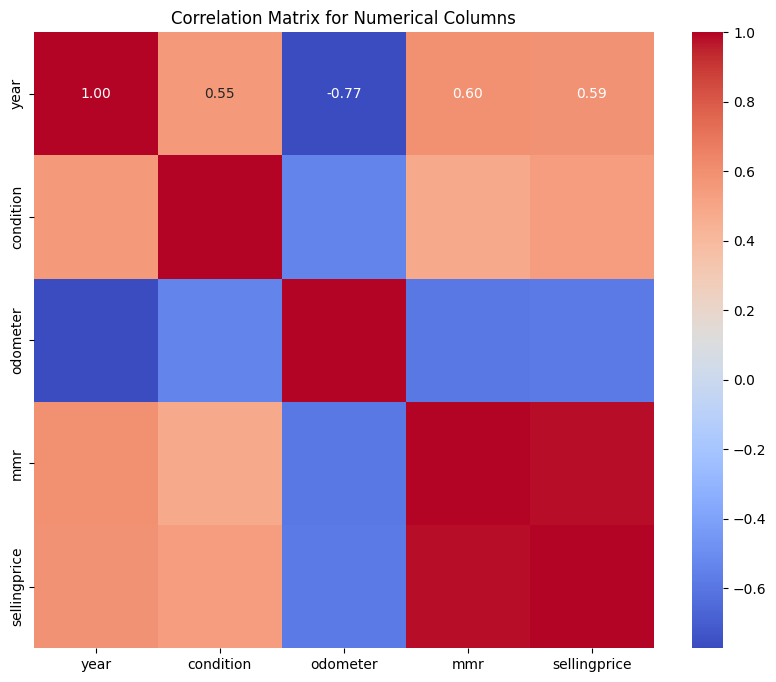

In [27]:
#Selecting numerical columns
numerical_columns = ['year', 'condition', 'odometer', 'mmr', 'sellingprice']

#Creating a correlation matrix
numerical_corr = car_df[numerical_columns].corr()

#Visualising the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Numerical Columns')
plt.show()

In [28]:
numerical_corr["sellingprice"].sort_values(ascending=False)

sellingprice    1.000000
mmr             0.983634
year            0.586488
condition       0.538787
odometer       -0.582405
Name: sellingprice, dtype: float64

In [29]:
# Selecting numerical columns of interest
numerical_columns = ['mmr', 'year', 'condition', 'odometer', 'sellingprice']

# Calculating Pearson correlation
pearson_corr = car_df[numerical_columns].corr(method='pearson')['sellingprice'].sort_values(ascending=False)

# Calculating Spearman correlation
spearman_corr = car_df[numerical_columns].corr(method='spearman')['sellingprice'].sort_values(ascending=False)

print("Pearson correlation of numerical variables with 'sellingprice':")
print(pearson_corr)

print("\nSpearman correlation of numerical variables with 'sellingprice':")
print(spearman_corr)

Pearson correlation of numerical variables with 'sellingprice':
sellingprice    1.000000
mmr             0.983634
year            0.586488
condition       0.538787
odometer       -0.582405
Name: sellingprice, dtype: float64

Spearman correlation of numerical variables with 'sellingprice':
sellingprice    1.000000
mmr             0.979468
year            0.679325
condition       0.616741
odometer       -0.704530
Name: sellingprice, dtype: float64


The correlation coefficients (Pearson and Spearman) between the numerical variables and the 'sellingprice' provide insights into the relationships between these variables:

1. Pearson Correlation:
    - The 'sellingprice' has a very strong positive correlation with 'mmr' (0.984), suggesting a high linear relationship between the maximum retail price ('mmr') and the selling price.
    - A moderately positive correlation exists between 'sellingprice' and 'year' (0.586) and 'condition' (0.539). This indicates that newer years and better conditions tend to be associated with higher selling prices, but the relationship is not as strong as with 'mmr'.
    - 'Sellingprice' has a moderately negative correlation with 'odometer' (-0.582), implying that as the odometer reading increases (indicating higher mileage), the selling price tends to decrease.

2. Spearman Correlation:
    - The Spearman correlation coefficients show similar trends to the Pearson correlation, but they consider monotonic relationships rather than just linear ones.
    - 'mmr' demonstrates a very strong positive monotonic relationship with 'sellingprice' (0.979).
    - 'Year', 'condition', and 'odometer' also show relatively strong positive and negative monotonic relationships with 'sellingprice', similar to Pearson correlations but considering non-linear associations.

Conclusions:
- Both Pearson and Spearman correlations indicate that 'mmr' has the strongest association with 'sellingprice', suggesting that the maximum retail price is highly influential in determining the selling price of cars.
- 'Year' and 'condition' have moderate positive associations, indicating that newer vehicles in better condition tend to have higher selling prices.
- Conversely, 'odometer' (indicating higher mileage) has a moderate negative association, meaning that increased mileage tends to decrease the selling price.

Correlation does not imply causation, and other factors not considered here might influence the selling price of cars. These correlation coefficients provide valuable insights into the relationships between these variables but do not establish causative relationships.

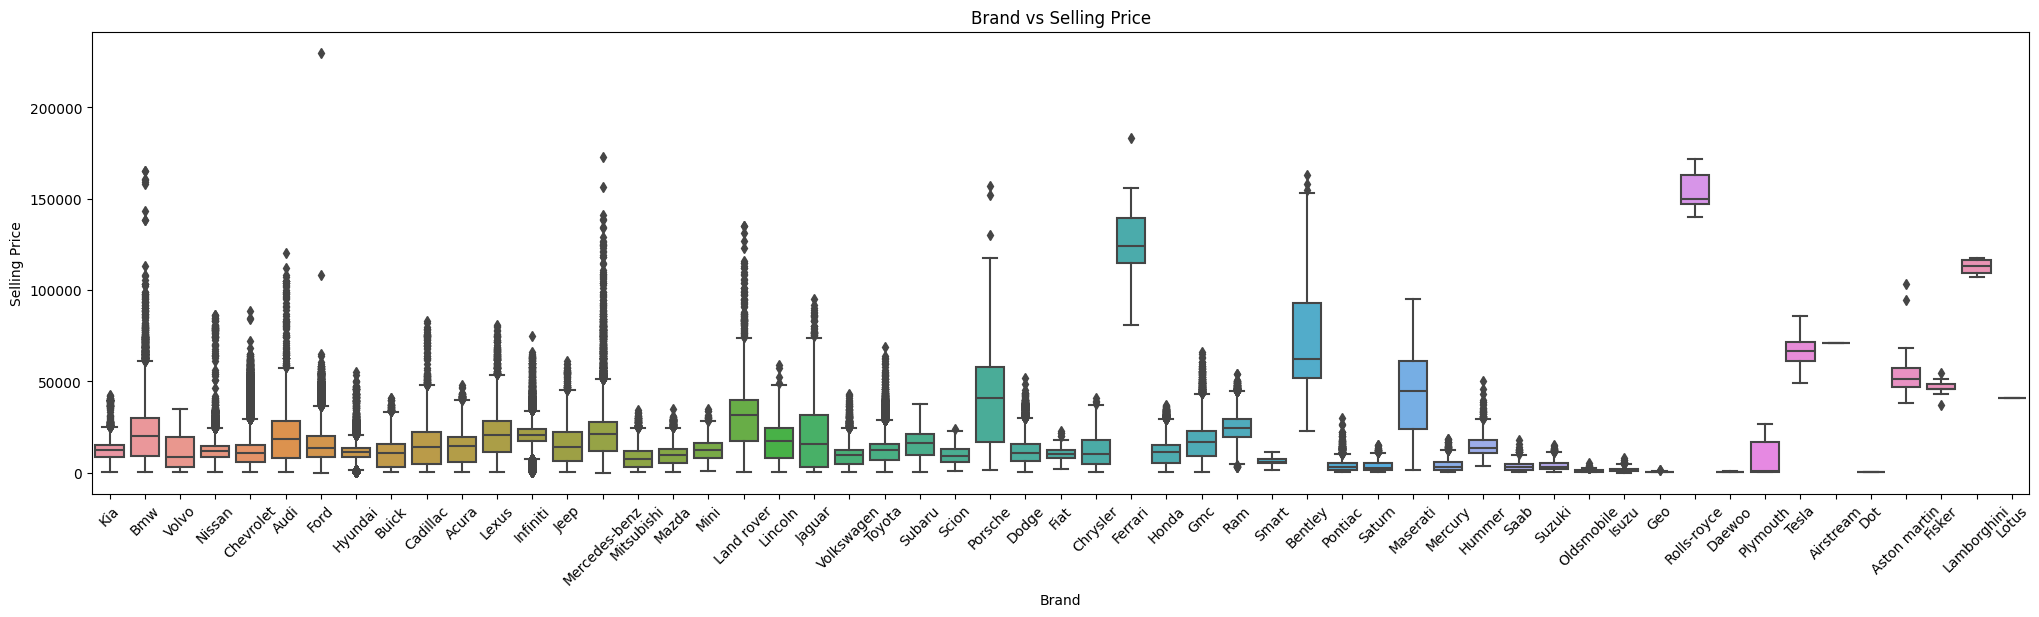

In [30]:
#Selecting a categorical column ('brand') to visualise its relationship with 'sellingprice'
categorical_column = 'brand'

#Creating a box plot to show 'sellingprice' distribution across different categories of 'brand'
plt.figure(figsize=(25, 6))
sns.boxplot(x=categorical_column, y='sellingprice', data=car_df)
plt.title(f'{categorical_column.capitalize()} vs Selling Price')
plt.xlabel(categorical_column.capitalize())
plt.ylabel('Selling Price')
plt.xticks(rotation=45)
plt.show()

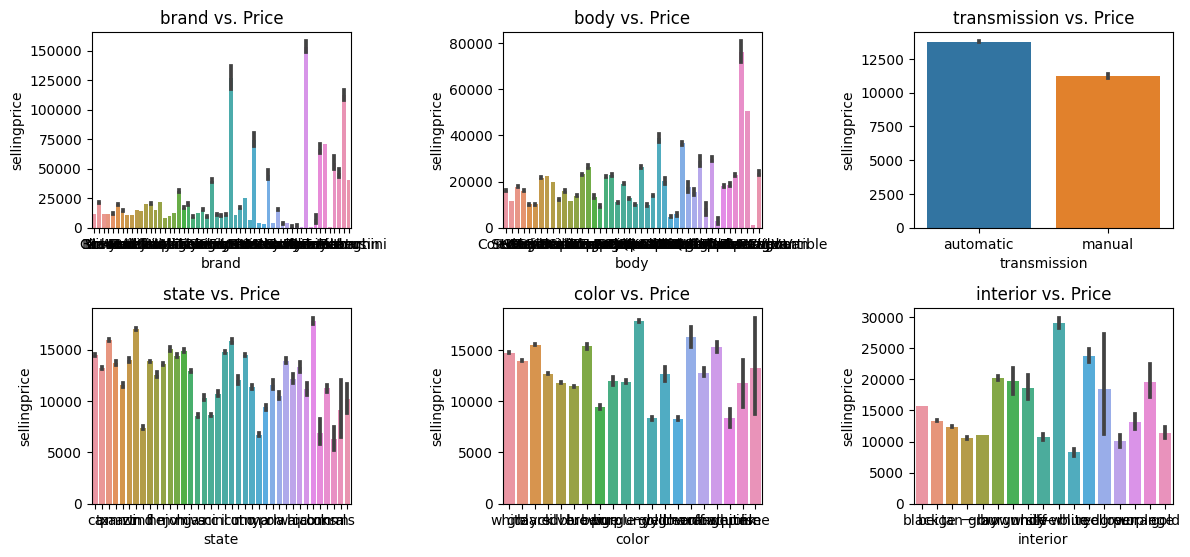

In [31]:
#Comparing different features to the price
categrical_columns=['brand', 'body', 'transmission', 'state', 'color', 'interior']
plt.figure(figsize=(12,8))
for feature in categrical_columns:
    plt.subplot(3, 3, categrical_columns.index(feature) + 1)
    sns.barplot(data=car_df, x=feature, y='sellingprice')
    plt.title(f'{feature} vs. Price')
plt.tight_layout()
plt.show()

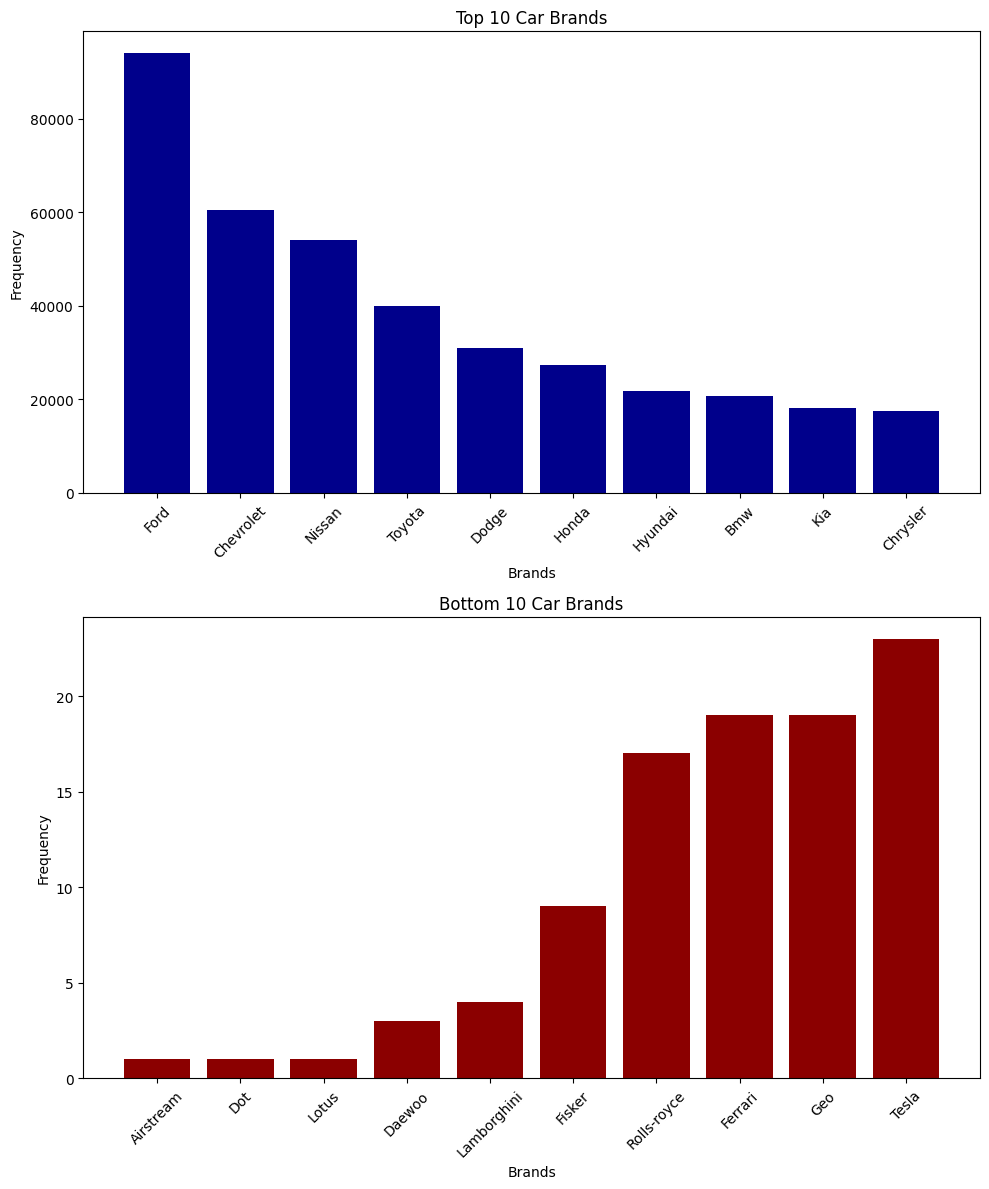

In [32]:
#Checking the top 10 and bottom 10 cars that are auctioned
top_10_brands = car_df['brand'].value_counts().nlargest(10)
bottom_10_brands = car_df['brand'].value_counts().nsmallest(10)

#Plotting both top 10 and bottom 10 brands in one figure
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

#Plotting the top 10 brands
axes[0].bar(top_10_brands.index, top_10_brands, color='darkblue')
axes[0].set_title('Top 10 Car Brands')
axes[0].set_xlabel('Brands')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', rotation=45)

#Plotting the bottom 10 brands
axes[1].bar(bottom_10_brands.index, bottom_10_brands, color='darkred')
axes[1].set_title('Bottom 10 Car Brands')
axes[1].set_xlabel('Brands')
axes[1].set_ylabel('Frequency')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [33]:
#Count the occurrences of each body type
body_counts = car_df['body'].value_counts()

#Get the top 10 body types
top_10_bodies = body_counts.head(10)

#Sum the counts of the body types not in the top 10
other_count = body_counts[10:].sum()

#Create a DataFrame with the top 10 bodies
top_bodies_df = pd.DataFrame({
    'body': top_10_bodies.index,
    'percent': top_10_bodies.values / len(car_df)
})

#Calculate 'Other' category and create its DataFrame
other_df = pd.DataFrame({'body': ['Other'], 'percent': [other_count / len(car_df)]})

#Concatenate top 10 bodies DataFrame and 'Other' DataFrame
combined_df = pd.concat([top_bodies_df, other_df], ignore_index=True)

#Create the pie chart using Plotly
fig = px.pie(
    combined_df,
    names='body',
    values='percent',
    title='Top 10 Body Types and Others',
    width=600,
    height=500
)

fig.show()

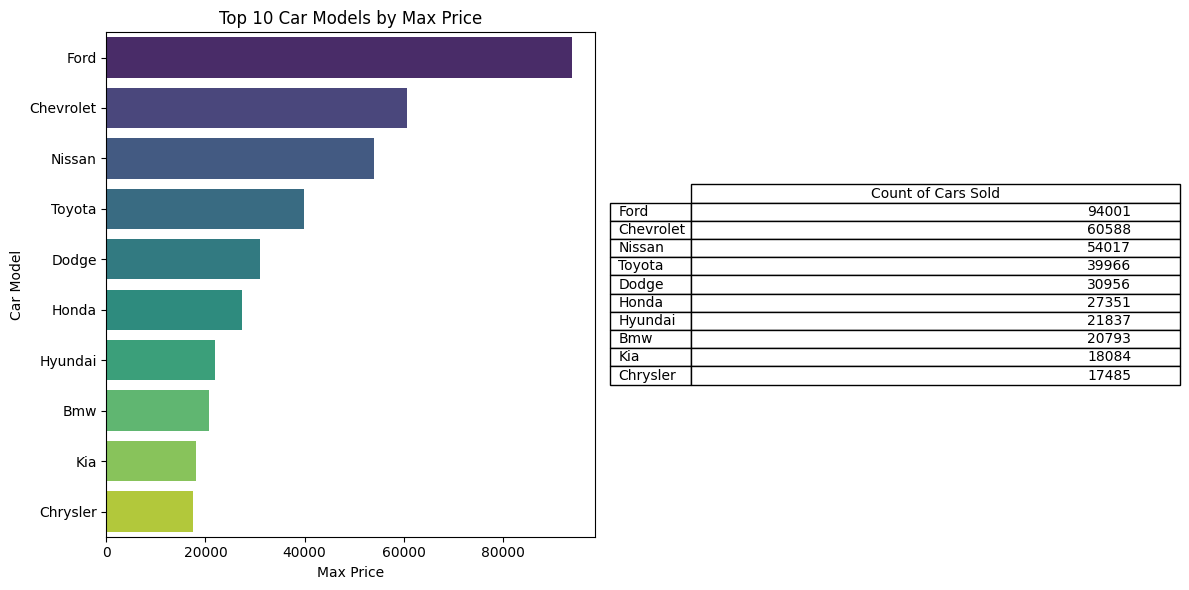

In [34]:
# Grouping by 'brand' and getting count of cars sold
cars_count = car_df['brand'].value_counts()

# Selecting top 10 car brands based on max selling price
top_car_brands = cars_count.head(10)

# Plotting a bar chart showing max selling price for top 10 car brands
plt.figure(figsize=(12, 6))

# Subplot for the bar chart
plt.subplot(1, 2, 1)
sns.barplot(x=top_car_brands.values, y=top_car_brands.index, palette='viridis')
plt.title('Top 10 Car Models by Max Price')
plt.xlabel('Max Price')
plt.ylabel('Car Model')

# Subplot for the table showing count of cars sold
plt.subplot(1, 2, 2)
plt.table(cellText=top_car_brands.values.reshape(-1, 1), 
          rowLabels=top_car_brands.index, 
          colLabels=['Count of Cars Sold'], 
          loc='center')
plt.axis('off')  # Hide axis for the table

plt.tight_layout()
plt.show()

In [35]:
# Performing ANOVA for 'brand' and 'sellingprice'
model = ols('sellingprice ~ C(brand)', data=car_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                sum_sq        df           F  PR(>F)
C(brand)  1.057256e+13      54.0  2597.53483     0.0
Residual  4.133965e+13  548456.0         NaN     NaN


The ANOVA test results show a strong relationship between the vehicle brands and their selling prices. The p-value of nearly zero indicates a significant difference in selling prices across different brands. In essence, the brand of a vehicle significantly influences its selling price in the market.

In [ ]:
# Performing ANOVA for 'brand' and 'sellingprice'
model = ols('sellingprice ~ C(body)', data=car_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                sum_sq        df            F  PR(>F)
C(body)   5.436064e+12      43.0  1493.942675     0.0
Residual  4.616736e+13  545573.0          NaN     NaN


In [ ]:
# Performing ANOVA for 'brand' and 'sellingprice'
model = ols('sellingprice ~ C(transmission)', data=car_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                       sum_sq        df            F         PR(>F)
C(transmission)  1.094535e+11       1.0  1167.581132  1.262530e-255
Residual         5.134058e+13  547669.0          NaN            NaN


In [ ]:
# Performing ANOVA for 'brand' and 'sellingprice'
model = ols('sellingprice ~ C(state)', data=car_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                sum_sq        df           F  PR(>F)
C(state)  2.696881e+12      37.0  807.760197     0.0
Residual  5.042126e+13  558774.0         NaN     NaN


In [ ]:
# Performing ANOVA for 'brand' and 'sellingprice'
model = ols('sellingprice ~ C(color)', data=car_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                sum_sq        df            F  PR(>F)
C(color)  2.405852e+12      19.0  1402.400717     0.0
Residual  5.038611e+13  558043.0          NaN     NaN


In [ ]:
# Performing ANOVA for 'brand' and 'sellingprice'
model = ols('sellingprice ~ C(interior)', data=car_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                   sum_sq        df            F  PR(>F)
C(interior)  3.165274e+12      16.0  2224.569593     0.0
Residual     4.962669e+13  558046.0          NaN     NaN


In [1]:
test carl

SyntaxError: invalid syntax (980637034.py, line 1)